In [106]:
'''
ECSE 556 Homework 1
Dimensionality Reduction
Gian Favero
October 6th, 2023
'''

# Common imports
import numpy as np
import matplotlib.pyplot as plt
import time

# import data
data = np.genfromtxt('Data/gdsc_expr_postCB.csv', delimiter=',')
data = data[1:,1:]
data = np.transpose(data)

Principal Component Analysis (PCA)

In [107]:
from sklearn.decomposition import PCA

# Create PCA object
pca = PCA(n_components=2)

# Fit and tranform data
pca_start = time.time()
data_pca = pca.fit_transform(data)
pca_end = time.time()

UMAP

In [108]:
import umap

# Create UMAP object
u_map = umap.UMAP(n_components=2)

# UMAP reduction of data
umap_start = time.time()
data_umap = u_map.fit_transform(data)
umap_end = time.time()

t-SNE

In [109]:
from sklearn.manifold import TSNE

# Generate TSNE object
tsne = TSNE(n_components=2)

# Fit and transform data
tsne_start = time.time()
data_tsne = tsne.fit_transform(data)
tsne_end = time.time()

Comparison

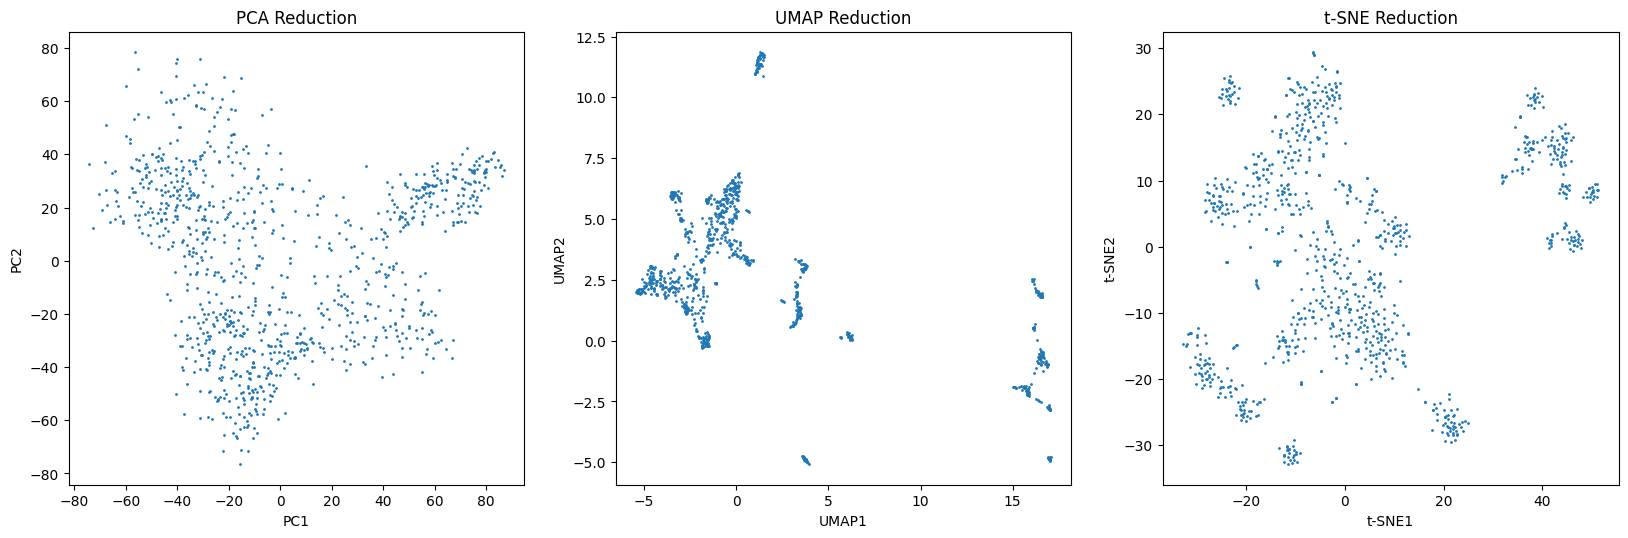

+-----------------------------+
|     Run Time Comparison     |
+--------+--------------------+
| Method |    Run Time (s)    |
+--------+--------------------+
|  PCA   | 0.9193880558013916 |
|  UMAP  | 6.179863214492798  |
|  TSNE  | 6.943530082702637  |
+--------+--------------------+


In [110]:
# Plotting
plt.figure(figsize=(20,20))
plt.subplot(331)
plt.scatter(data_pca[:,0], data_pca[:,1], s=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Reduction')
plt.subplot(332)
plt.scatter(data_umap[:,0], data_umap[:,1], s=1)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP Reduction')
plt.subplot(333)
plt.scatter(data_tsne[:,0], data_tsne[:,1], s=1)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Reduction')
plt.show()

# Run time comparison
import prettytable as pt

t = pt.PrettyTable(['Method', 'Run Time (s)'])
t.add_row(['PCA', pca_end - pca_start])
t.add_row(['UMAP', umap_end - umap_start])
t.add_row(['TSNE', tsne_end - tsne_start])
t.title = 'Run Time Comparison'
print(t)